In [2]:
import pandas as pd
from matplotlib import pyplot as plt


In [3]:
header = ['Length',  'Redundancy',  'Number of examples',  'To learn',  'Learned',  'With mistake',  'Imprecise',  'Excepted']

pandas_result = pd.read_csv('pandas.csv', lineterminator=';')
polars_result = pd.read_csv('polars.csv', lineterminator=';')
spark_result = pd.read_csv('spark.csv', lineterminator=';')

pandas_result.columns = header
polars_result.columns = header
spark_result.columns = header

/var/folders/pq/9pks_cwx6ndb681g1jcg3dd80000gn/T/ipykernel_9593/1616347433.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  pandas_result.to_latex('pandas.tex', index=False)


In [5]:
for df in [pandas_result, polars_result, spark_result]:
    df['Learned ratio'] = (df['Learned'] / df['To learn']).round(2)
    df['Mistakes to learned'] = (df['With mistake'] / df['Learned']).round(2)
    df['Imprecise to learned'] = (df['Imprecise'] / df['Learned']).round(2)

pandas_result.to_latex('pandas.tex', index=False, escape = False, header=['\\rotatebox{90}{' + c + '}' for c in pandas_result.columns])
polars_result.to_latex('polars.tex', index=False, escape = False, header=['\\rotatebox{90}{' + c + '}' for c in polars_result.columns])
spark_result.to_latex('spark.tex', index=False, escape = False, header=['\\rotatebox{90}{' + c + '}' for c in spark_result.columns])

/var/folders/pq/9pks_cwx6ndb681g1jcg3dd80000gn/T/ipykernel_9593/1207961527.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  pandas_result.to_latex('pandas.tex', index=False, header=['\\rotatebox{90}{' + c + '}' for c in pandas_result.columns])
/var/folders/pq/9pks_cwx6ndb681g1jcg3dd80000gn/T/ipykernel_9593/1207961527.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  polars_result.to_latex('polars.tex', index=False, header=['\\rotatebox{90}{' + c + '}' for c in polars_r

   Length    Pandas    Polars  Spark
0       1       NaN       NaN    NaN
1       2  1.000000  0.857143    1.0
2       4  0.956522       NaN    1.0
3       6       NaN       NaN    NaN


<AxesSubplot: xlabel='Length'>

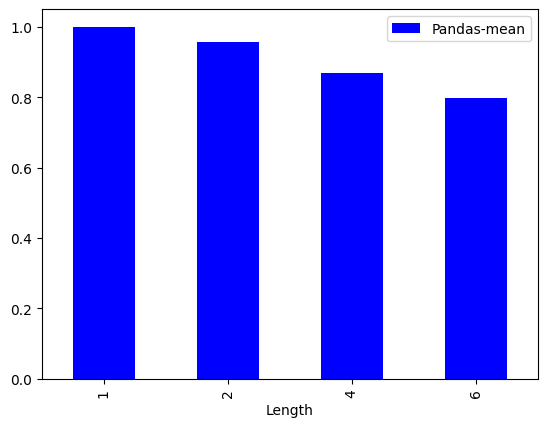

In [58]:
ratio_to_length_mean = pd.DataFrame({})
ratio_to_length_mean['Length'] = pandas_result['Length'].unique()
ratio_to_length_mean['Pandas'] = pandas_result.groupby('Length').mean()['Learned ratio']
ratio_to_length_mean['Polars'] = polars_result.groupby('Length').mean()['Learned ratio']
ratio_to_length_mean['Spark'] = spark_result.groupby('Length').mean()['Learned ratio']
print(ratio_to_length_mean)
pandas_result.groupby('Length').mean().plot.bar(y='Learned ratio', label='Pandas-mean', color='blue')
polars_result.groupby('Length').mean().plot.bar(y='Learned ratio', ax=length_plot, label='Polars-mean', color='red')
spark_result.groupby('Length').mean().plot.bar(y='Learned ratio', ax=length_plot, label='Spark-mean', color='green')

In [ ]:
redundancy_plot = pandas_result[pandas_result['Length']>1].groupby('Redundancy').mean().plot(y='Learned ratio', label='Pandas', style='o')
polars_result[polars_result['Length']>1].groupby('Redundancy').mean().plot(y='Learned ratio', ax=redundancy_plot, label='Polars', style='o')
spark_result[spark_result['Length']>1].groupby('Redundancy').mean().plot(y='Learned ratio', ax=redundancy_plot, label='Spark', style='o')